In [1]:
import pandas as pd
import os
from collections import defaultdict
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import json

/research2/lrbutler/miniconda3/envs/tisearch/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
dataset_file_path = '/home/bchen1/data/dataset'
train = 'TextCaps_0.1_train.json'
val = 'TextCaps_0.1_val.json'


In [ ]:
# Load sentence embedding model
text_model = SentenceTransformer('all-MiniLM-L6-v2')
def encode_text_to_embedding(text):
    text_features = text_model.encode(text)
    text_tensor = torch.tensor(text_features).unsqueeze(0).float().to(device)
    with torch.no_grad():
        predicted_embedding = model(text_tensor)
    return predicted_embedding.cpu().numpy()


class_categories = {"Person": "Human", "Woman": "Human", "Man": "Human", "Girl": "Human", "Boy": "Human", "Human face": "Human", "Human arm": "Human", "Human leg": "Human", "Clothing": "Apparel", "Shirt": "Apparel", "Dress": "Apparel", "Footwear": "Apparel", "Hat": "Apparel", "Glove": "Apparel", "Scarf": "Apparel", "Sunglasses": "Apparel", "Jewelry": "Apparel", "Food": "Food & Drink", "Drink": "Food & Drink", "Beer": "Food & Drink", "Wine": "Food & Drink", "Dairy": "Food & Drink", "Snack": "Food & Drink", "Fruit": "Food & Drink", "Vegetable": "Food & Drink", "Pizza": "Food & Drink", "Cookie": "Food & Drink", "Furniture": "Furniture & Home", "Chair": "Furniture & Home", "Bed": "Furniture & Home", "Table": "Furniture & Home", "Lamp": "Furniture & Home", "Refrigerator": "Furniture & Home", "Oven": "Furniture & Home", "Shelf": "Furniture & Home", "Mirror": "Furniture & Home", "Tool": "Tools & Appliances", "Screwdriver": "Tools & Appliances", "Blender": "Tools & Appliances", "Microwave oven": "Tools & Appliances", "Washing machine": "Tools & Appliances", "Printer": "Tools & Appliances", "Building": "Architecture", "House": "Architecture", "Window": "Architecture", "Door": "Architecture", "Tower": "Architecture", "Castle": "Architecture", "Skyscraper": "Architecture", "Vehicle": "Transportation", "Car": "Transportation", "Bus": "Transportation", "Train": "Transportation", "Airplane": "Transportation", "Helicopter": "Transportation", "Motorcycle": "Transportation", "Boat": "Transportation", "Bicycle": "Transportation", "Sports equipment": "Sports & Leisure", "Ball": "Sports & Leisure", "Racket": "Sports & Leisure", "Scoreboard": "Sports & Leisure", "Skateboard": "Sports & Leisure", "Toy": "Sports & Leisure", "Guitar": "Sports & Leisure", "Piano": "Sports & Leisure", "Mobile phone": "Electronics", "Laptop": "Electronics", "Computer monitor": "Electronics", "Keyboard": "Electronics", "Mouse": "Electronics", "Tablet": "Electronics", "Television": "Electronics", "Calculator": "Electronics", "Tree": "Nature & Animals", "Flower": "Nature & Animals", "Plant": "Nature & Animals", "Mammal": "Nature & Animals", "Bird": "Nature & Animals", "Dog": "Nature & Animals", "Cat": "Nature & Animals", "Fish": "Nature & Animals", "Insect": "Nature & Animals", "Poster": "Art & Display", "Picture frame": "Art & Display", "Sculpture": "Art & Display", "Painting": "Art & Display", "Billboard": "Art & Display", "Crown": "Art & Display", "Box": "Containers & Packaging", "Bottle": "Containers & Packaging", "Jar": "Containers & Packaging", "Cup": "Containers & Packaging", "Bowl": "Containers & Packaging", "Plate": "Containers & Packaging", "Tin can": "Containers & Packaging", "Bag": "Containers & Packaging", "Suitcase": "Containers & Packaging"}


Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


In [4]:
train_data = pd.read_json(os.path.join(dataset_file_path, train))

In [12]:
print(train_data)

       dataset_type dataset_name  dataset_version  \
0             train     textcaps              0.1   
1             train     textcaps              0.1   
2             train     textcaps              0.1   
3             train     textcaps              0.1   
4             train     textcaps              0.1   
...             ...          ...              ...   
109760        train     textcaps              0.1   
109761        train     textcaps              0.1   
109762        train     textcaps              0.1   
109763        train     textcaps              0.1   
109764        train     textcaps              0.1   

                                                     data  
0       {'image_id': '011e7e629fb9ae7b', 'image_classe...  
1       {'image_id': '09efcb22ca121f57', 'image_classe...  
2       {'image_id': '0c3643013a53da39', 'image_classe...  
3       {'image_id': '138b2bd1a1f8ec61', 'image_classe...  
4       {'image_id': '0f21976214ebc938', 'image_classe...  
...

In [5]:
all_classes = {}
for i, row in train_data.iterrows():
    classes = row["data"]['image_classes']
    for c in classes:
        if c in all_classes:
            all_classes[c] += 1
        else:
            all_classes[c] = 1



In [6]:
for key, value in all_classes.items():
    print(f"{key}: {value}")
    

Personal care: 470
Perfume: 1450
Clock: 5710
Watch: 4735
Wall clock: 1940
Mobile phone: 6245
Laptop: 5070
Parking meter: 490
Frying pan: 75
Pressure cooker: 370
Book: 13995
Bookcase: 1480
Furniture: 2900
Shelf: 2505
Computer monitor: 3875
Television: 2520
Picture frame: 1275
Beer: 6450
Person: 31745
Drink: 14300
Bottle: 14985
Juice: 595
Dairy: 360
Food: 5150
Poster: 10800
Tin can: 2790
Clothing: 20810
Football: 2065
Plant: 5865
Sports equipment: 10350
Box: 2255
Land vehicle: 4095
Vehicle: 11250
Wheel: 2190
Car: 6255
Taxi: 2525
Bus: 1835
Tree: 3850
Building: 5800
Window: 1195
Traffic sign: 2535
Computer keyboard: 3880
Office supplies: 1380
Footwear: 7395
Stop sign: 1070
Sports uniform: 15815
Boy: 6850
Shirt: 1000
Flag: 475
Man: 14790
Human face: 6000
Alarm clock: 990
Handbag: 80
Wine: 4785
Coin: 1975
Fashion accessory: 4620
Fast food: 1020
French fries: 20
Helicopter: 320
Airplane: 3200
Aircraft: 2630
Vehicle registration plate: 2370
Trousers: 395
Snack: 1760
Van: 1125
Woman: 6870
Sculp

In [7]:
with open("all_classes.json", "w", encoding="utf-8") as f:
    json.dump(all_classes, f, indent=4, ensure_ascii=False)

In [8]:
superclass_counts = defaultdict(int)
superclass_to_subclasses = defaultdict(list)

In [9]:
for cls, count in all_classes.items():
    if cls in class_categories:
        super_cls = class_categories[cls]
        superclass_counts[super_cls] += count
        superclass_to_subclasses[super_cls].append(cls)

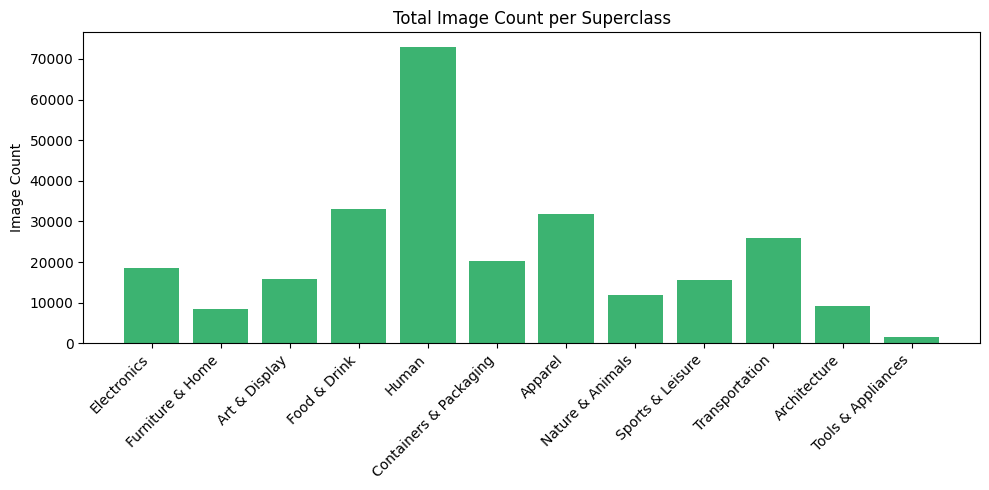

In [10]:
plt.figure(figsize=(10, 5))
plt.bar(superclass_counts.keys(), superclass_counts.values(), color='mediumseagreen')
plt.xticks(rotation=45, ha='right')
plt.title("Total Image Count per Superclass")
plt.ylabel("Image Count")
plt.tight_layout()
plt.show()



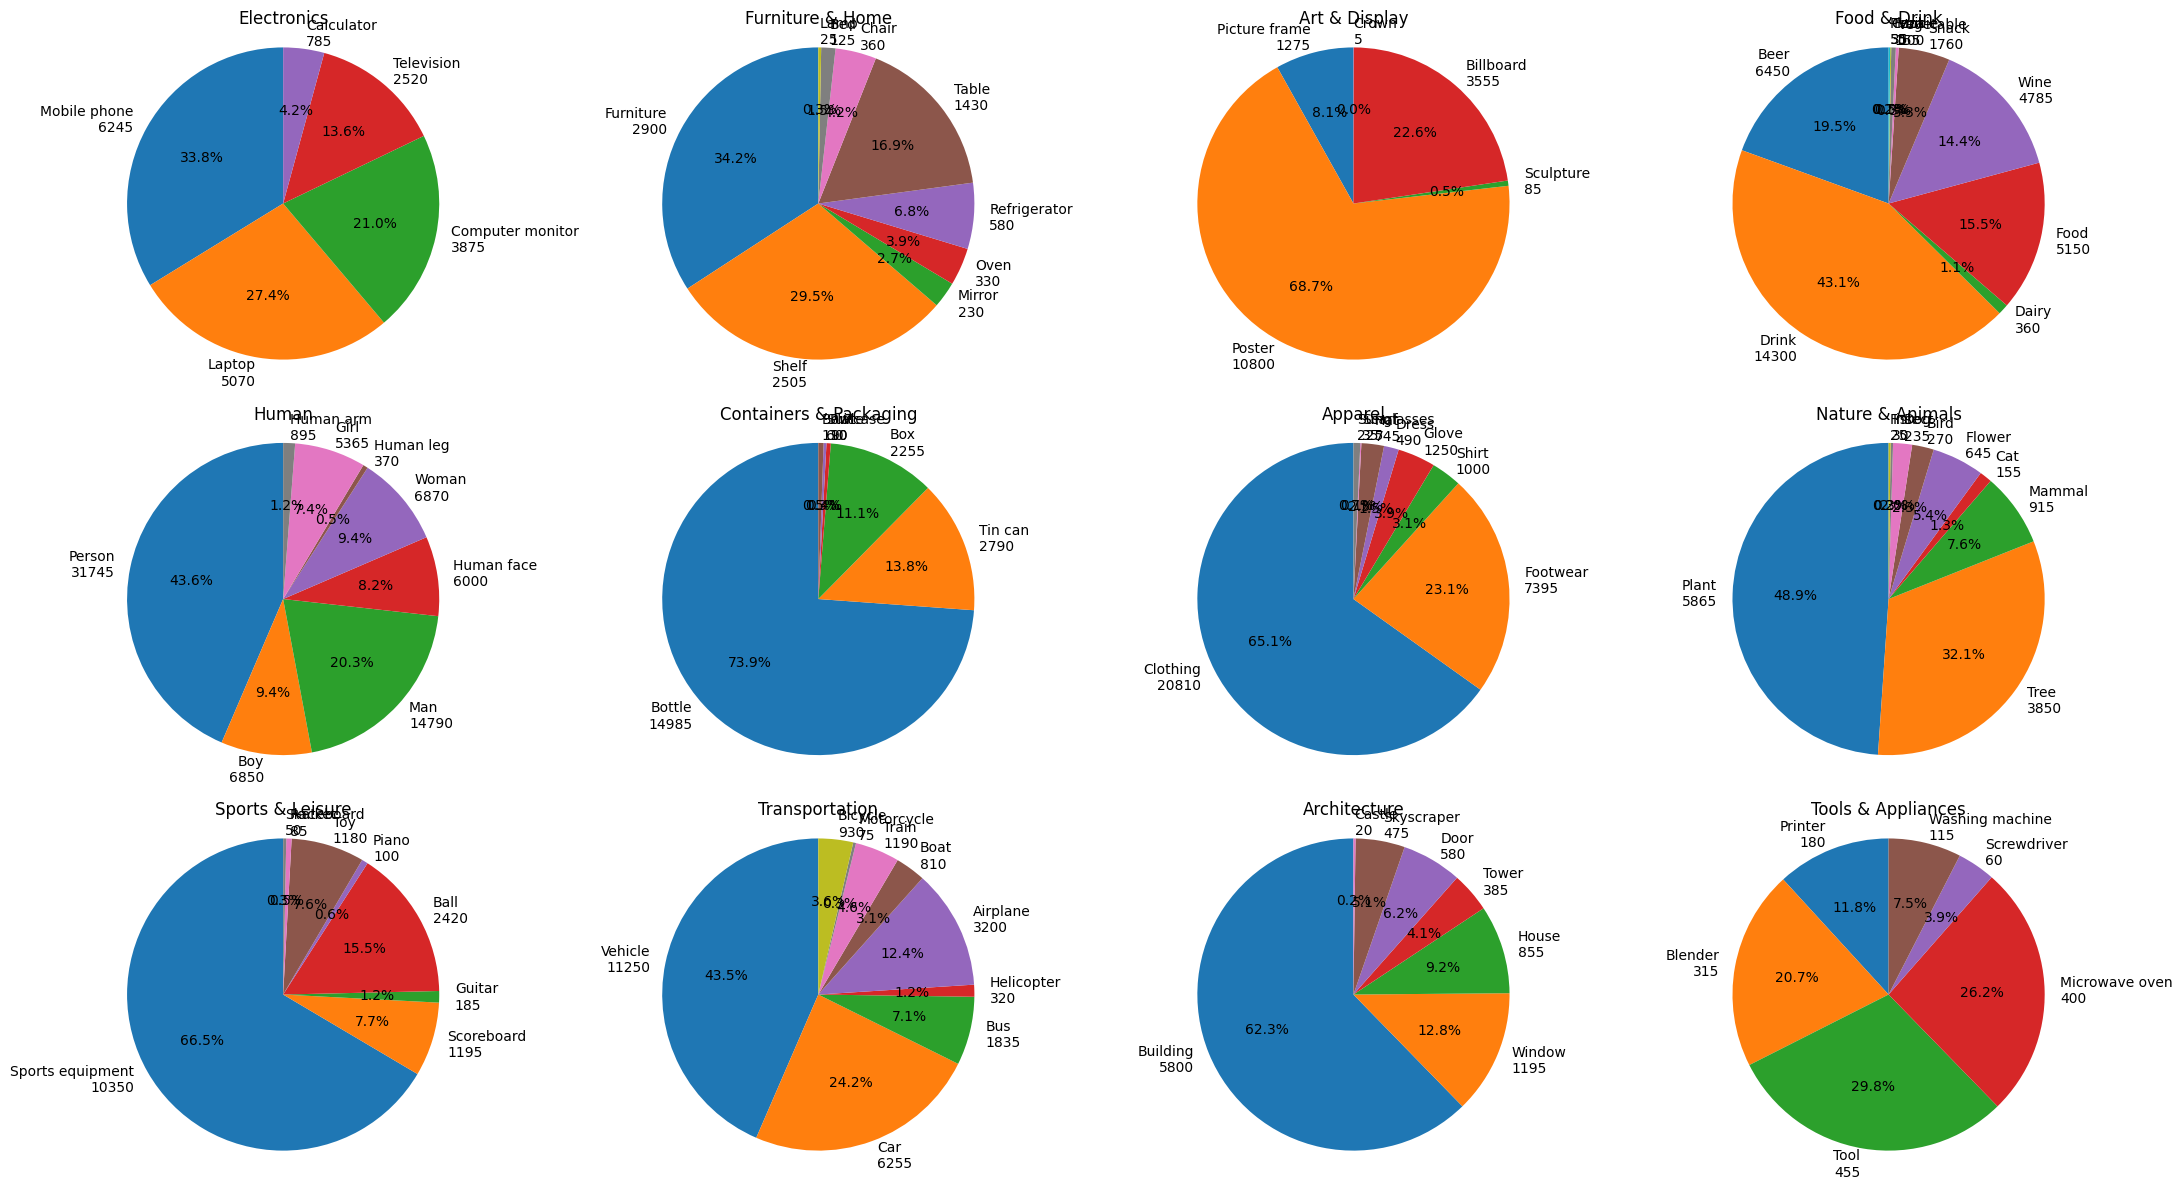

In [11]:
num_plots = len(superclass_to_subclasses)
cols = 4
rows = (num_plots + cols - 1) // cols

fig, axs = plt.subplots(rows, cols, figsize=(22, 12))
axs = axs.flatten()

for i, (super_cls, subclasses) in enumerate(superclass_to_subclasses.items()):
    sub_counts = {cls: all_classes.get(cls, 0) for cls in subclasses}
    labels = [f"{cls}\n{count}" for cls, count in sub_counts.items()]
    sizes = list(sub_counts.values())

    if sum(sizes) == 0:
        sizes = [1] * len(labels) 
        labels = [f"{cls}\n0" for cls in subclasses]

    axs[i].pie(sizes, labels=labels, startangle=90, autopct='%1.1f%%')
    axs[i].axis('equal')
    axs[i].set_title(super_cls, fontsize=12)

for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()